In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import shutil

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "./Dataset/Preprocessed"
# Define the number of classes in your dataset
num_classes = 5

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

X = []
y = []

for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # Load the preprocessed image from disk
        img = np.load(os.path.join(data_dir, filename))

        # Extract the label from the filename (assuming the label is the first part of the filename)
        try:
            label = int(filename.split("_")[0])
        except ValueError:
            print(f"Invalid filename: {filename}")
            continue

        # Augment the image using the data generator
        img = img.reshape((1,) + img.shape)
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0]
            break

        # Append the preprocessed image and its label to the X and y lists
        X.append(augmented_img)
        y.append(label)


In [3]:
# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [4]:
# Convert the labels to one-hot encoding
y = np.eye(num_classes)[y]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

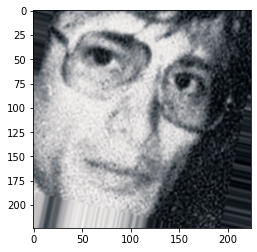

In [6]:
plt.imshow(X_test[30])
#y_test[410]

In [7]:
print(X_train.shape)
print(X_test.shape)

(244, 224, 224, 3)
(62, 224, 224, 3)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the DeepFace model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [9]:
# Compile the model with an appropriate loss function and optimizer
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train,batch_size=10, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
25/25 [==============================] - 11s 410ms/step - loss: 1.6241 - accuracy: 0.2582 - val_loss: 1.5148 - val_accuracy: 0.3710
Epoch 2/15
25/25 [==============================] - 10s 423ms/step - loss: 1.5215 - accuracy: 0.3320 - val_loss: 1.2495 - val_accuracy: 0.4516
Epoch 3/15
25/25 [==============================] - 10s 415ms/step - loss: 1.1805 - accuracy: 0.5000 - val_loss: 1.1975 - val_accuracy: 0.5968
Epoch 4/15
25/25 [==============================] - 10s 411ms/step - loss: 0.8941 - accuracy: 0.6107 - val_loss: 0.9696 - val_accuracy: 0.7419
Epoch 5/15
25/25 [==============================] - 9s 355ms/step - loss: 0.6792 - accuracy: 0.7582 - val_loss: 0.8433 - val_accuracy: 0.7419
Epoch 6/15
25/25 [==============================] - 9s 362ms/step - loss: 0.4915 - accuracy: 0.7910 - val_loss: 1.1208 - val_accuracy: 0.6774
Epoch 7/15
25/25 [==============================] - 9s 361ms/step - loss: 0.3662 - accuracy: 0.8770 - val_loss: 0.9393 - val_accuracy: 0.6935
Ep

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model accuracy vs Loss")
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'],loc='best')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'],loc='best')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='best')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot (history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper left') 
plt.show()

In [ ]:
class_names = ['Osama','Pablo',"Daud","Charles","ElChapo"]

In [ ]:
import random
n=random.randint(0,50)
plt.imshow(X_test[n])

In [ ]:
prediction=model.predict(X_test)

In [ ]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("Criminal detected: ",Pred_obj)

In [ ]:
n=random.randint(0,36)
plt.imshow(X_test[n])

In [ ]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("Criminal detected: ",Pred_obj)

In [ ]:
prediction[n]

In [ ]:
9.9999952e-01+3.2201032e-07+7.6572974e-08

In [ ]:
prediction

In [ ]:
model.save("deepfacemodel5.hdf5")